In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

##Dataset Creation

In [2]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2)

In [3]:
X

array([[-0.01591419, -5.29572206],
       [ 6.58055496, -8.95147584],
       [-0.85945317, -5.69415046],
       ...,
       [-1.63005386, -4.75942046],
       [-8.16823516, -5.26480917],
       [-0.11339183, -3.31274772]])

In [4]:
y

array([1, 2, 1, 0, 0, 2, 0, 1, 1, 0, 2, 1, 1, 2, 2, 2, 0, 0, 0, 0, 2, 2,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 2, 1, 1, 0, 0, 2, 2, 2, 2, 0, 1, 1,
       0, 0, 0, 2, 1, 2, 2, 2, 0, 2, 0, 0, 2, 1, 0, 0, 0, 0, 2, 0, 0, 2,
       1, 2, 0, 0, 0, 1, 0, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2,
       0, 2, 1, 0, 2, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 0, 2, 0, 2, 1, 0, 2,
       0, 2, 2, 2, 1, 2, 2, 0, 2, 1, 2, 2, 0, 1, 0, 2, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 2, 1, 0, 2, 0, 0, 2, 1, 1, 1, 2, 0, 2, 2, 0,
       0, 1, 1, 0, 1, 2, 0, 0, 0, 0, 2, 2, 0, 0, 0, 1, 1, 0, 0, 2, 1, 0,
       1, 0, 0, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 2, 2, 1, 0, 0, 0, 0, 0, 2,
       1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 0, 0, 1, 1, 2, 1, 2, 0, 0, 2, 0,
       2, 2, 1, 1, 1, 2, 2, 1, 2, 0, 0, 1, 1, 0, 2, 2, 0, 1, 0, 0, 2, 1,
       1, 1, 2, 1, 1, 0, 0, 2, 2, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 2, 2, 1, 1, 1, 0, 0, 2, 0, 1, 2, 1,
       0, 0, 0, 2, 2, 2, 0, 1, 0, 0, 0, 2, 0, 2, 2,

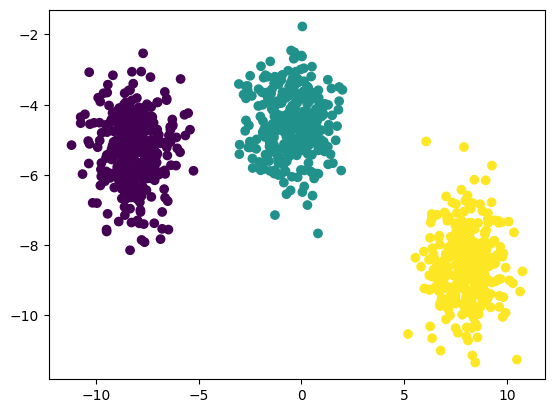

In [5]:
plt.scatter(X[:,0],X[:,1],c=y)

In [6]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

##Data Splitting

In [7]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

In [10]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

##Elbow method to find out the value of K

In [11]:
from sklearn.cluster import KMeans

In [12]:
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [13]:
wcss

[1340.0000000000005,
 334.8979243260145,
 168.58817366533444,
 133.15399869752292,
 100.38883008277054,
 72.1161238452823,
 61.97039181178842,
 52.0267166006641,
 44.279662211191294,
 39.61491807705225]

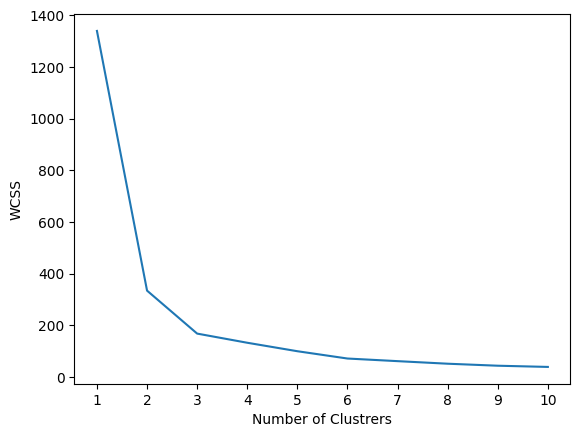

In [14]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of Clustrers")
plt.ylabel("WCSS")
plt.show()

In [15]:
#From the elbow curve it is seen after value 3 there is no abrupt change so we take K value as 3
kmeans=KMeans(n_clusters=3,init="k-means++")

In [16]:
kmeans.fit_predict(X_train_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 1, 1, 2, 2, 1, 0, 1, 2, 2, 1, 2, 0, 1, 2, 1, 2, 1, 2, 0, 1, 1,
       2, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 1, 1, 2, 0, 0, 0, 2, 2, 2, 2, 1,
       0, 0, 2, 2, 1, 1, 0, 1, 2, 1, 1, 1, 2, 2, 1, 0, 2, 0, 1, 0, 1, 1,
       1, 1, 1, 2, 0, 0, 1, 1, 0, 1, 0, 0, 1, 2, 1, 1, 1, 1, 2, 0, 0, 1,
       1, 1, 0, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 1, 1, 2, 2, 1, 1, 1, 0,
       2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1, 0, 1, 0, 0, 2, 2, 1, 2, 0, 1, 1,
       0, 0, 0, 1, 2, 0, 2, 2, 1, 1, 0, 1, 2, 2, 0, 0, 2, 1, 0, 0, 2, 1,
       2, 2, 2, 1, 0, 1, 1, 1, 2, 2, 1, 0, 2, 0, 0, 0, 2, 0, 2, 0, 2, 2,
       2, 1, 2, 2, 0, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 0, 2, 2, 1, 0, 1, 1,
       2, 0, 1, 0, 2, 1, 2, 0, 0, 2, 0, 2, 0, 2, 0, 1, 0, 2, 1, 1, 0, 0,
       1, 2, 0, 2, 2, 1, 0, 1, 0, 1, 0, 2, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 2, 1, 2, 1, 2, 1, 0, 0, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 2, 0, 0, 1, 1, 1, 2, 2, 1, 1, 2, 1, 0, 1,
       0, 2, 1, 0, 1, 0, 1, 0, 0, 0, 2, 0, 2, 2, 2,

In [17]:
y_pred=kmeans.predict(X_test_scaled)

In [18]:
y_pred

array([2, 0, 1, 1, 2, 2, 2, 2, 0, 0, 0, 2, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2,
       2, 1, 0, 1, 0, 0, 0, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 2, 2, 2, 0, 1, 2, 1, 2, 2, 2, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 1, 2, 0, 2, 0, 0, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 0, 2,
       0, 0, 1, 2, 2, 1, 2, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 2, 0, 0,
       1, 2, 0, 2, 2, 1, 1, 1, 1, 0, 1, 0, 1, 2, 2, 0, 1, 2, 0, 2, 0, 2,
       1, 2, 2, 0, 1, 1, 2, 0, 0, 0, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 0, 2,
       0, 0, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 0, 1, 2, 2, 2, 0, 0, 0, 2, 1,
       1, 0, 2, 0, 1, 2, 0, 2, 0, 0, 0, 2, 2, 0, 2, 2, 0, 0, 1, 1, 1, 1,
       2, 2, 2, 2, 2, 2, 0, 2, 1, 1, 2, 2, 1, 0, 0, 1, 2, 2, 2, 1, 1, 1,
       0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 1, 0, 1, 2, 2, 2, 2, 1, 0, 0, 0, 2,
       2, 1, 1, 1, 2, 1, 2, 0, 1, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 0, 1,
       1, 1, 2, 2, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2,
       2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 0, 2, 2, 0,

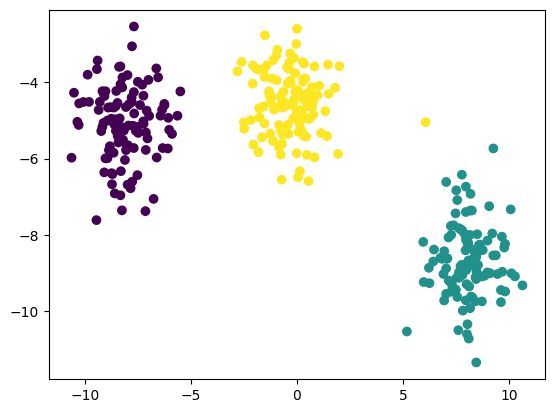

In [19]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

In [ ]:
## Validating the k value
## kneelocator
## Silhoutee scoring

In [20]:
## kneelocator
!pip install kneed

In [21]:
from kneed import KneeLocator

In [22]:
kl=KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [23]:
kl.elbow

3

In [24]:
## silhoutte score
from sklearn.metrics import silhouette_score

In [25]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score=silhouette_score(X_train_scaled,kmeans.labels_)
    silhouette_coefficients.append(score)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [26]:
silhouette_coefficients

[0.6759582730375814,
 0.6254943140683057,
 0.5882315779254013,
 0.5007974653507795,
 0.47338600572412365,
 0.4624852736760944,
 0.45029101243479364,
 0.43266802103968083,
 0.42379707304557235]

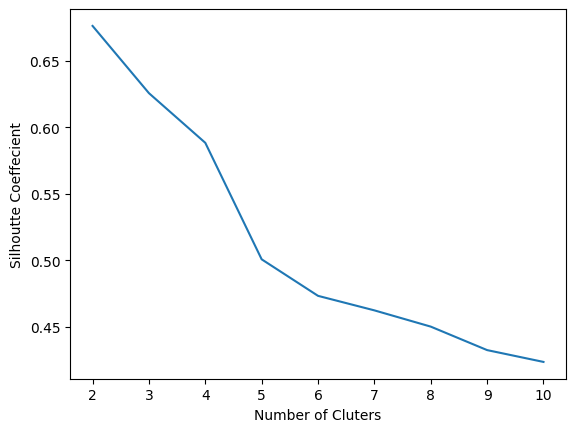

In [27]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Cluters")
plt.ylabel("Silhoutte Coeffecient")
plt.show()